In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# The spiking of an MT neuron

In [2]:
# load the spiking of an MT neuron

mt_neuron_path = '../freedman2006/MT/dseao01.mat'

In [3]:
mt_neuron = loadmat(mt_neuron_path)

In [4]:
# dictionary
mt_neuron.keys()

dict_keys(['__header__', '__version__', '__globals__', 'trial_raster', 'samp_direction_this_trial', 'test_direction_this_trial'])

In [5]:
# what shape?
mt_neuron['trial_raster'].shape

(246, 2700)

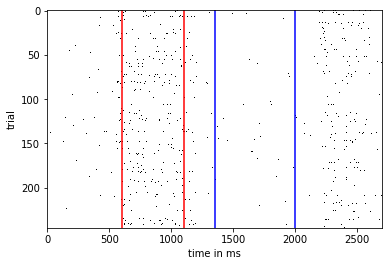

In [6]:
# ploting this raster

plt.figure()
plt.imshow(mt_neuron['trial_raster'], aspect='auto', cmap='gray_r')
plt.xlabel('time in ms')
plt.ylabel('trial')
# initial stimulus presentation
plt.axvline(600, c='r')
plt.axvline(1100, c='r')
# delay period
plt.axvline(1350, c='b')
plt.axvline(2000, c='b')
plt.show()

In [7]:
# the trials are not ordered!
mt_neuron['samp_direction_this_trial']

array([[150, 180, 240,  90,  90, 300, 240, 210,  60,  30,  60, 300,  30,
        150,  90, 150, 270, 300,  90,  60,  30, 180, 180,  30,  30, 240,
        180, 330, 150, 120, 180, 330, 240,  60,   0,  30, 120, 330, 330,
         90, 120, 240, 150, 300, 270,   0, 240,  90, 180,  90,  30, 180,
        270, 300, 270, 240, 330, 240, 120, 240, 180, 270, 270, 240,  90,
         60,   0, 300, 330,  30,   0, 120, 240,  60,  30, 240, 270, 150,
          0, 270, 240, 210, 180,  30, 330, 240,   0, 150,   0, 180,  90,
          0,   0, 330, 300,   0,  30, 120, 240,  60, 270, 300,   0,  90,
          0, 330, 180,  60,  30,  60, 300,  30, 270, 270,  90, 180, 210,
        150,  90, 270, 150, 330, 180, 180, 180, 330, 180, 150,  30,   0,
        180, 150,  60, 300, 180, 150, 120, 240,  60,  60, 210, 120, 120,
        330,  60, 150, 330, 300, 210,   0,   0, 180, 150, 240, 150, 300,
        210, 300, 180,   0,  60, 240,   0, 240, 300, 150, 270,  60,  60,
        330,  60, 210, 150, 180, 150, 180,  90, 240

In [8]:
# sorting these trials

In [9]:
# example

unsorted_array = np.random.rand(3)
unsorted_array

array([0.96549776, 0.91355786, 0.97206376])

In [10]:
indices = np.argsort(unsorted_array)
indices

array([1, 0, 2])

In [11]:
sorted_array = unsorted_array[indices]
sorted_array

array([0.91355786, 0.96549776, 0.97206376])

In [12]:
mt_neuron['samp_direction_this_trial'].shape

(1, 246)

In [13]:
# we want to focus on this second index
# squeeze will do the job, ex:
np.random.rand(3,1).squeeze().shape

(3,)

In [14]:
unsorted_directions = mt_neuron['samp_direction_this_trial'].squeeze()
unsorted_directions.shape

(246,)

In [15]:
sorted_indices = np.argsort(unsorted_directions)
sorted_indices.shape

(246,)

In [16]:
# using these sorted indices to plot an raster with sorted rows
raster = mt_neuron['trial_raster']
raster.shape

(246, 2700)

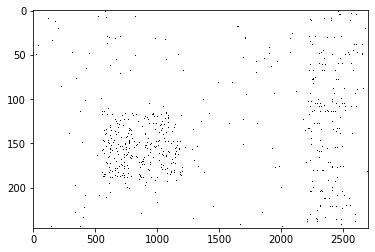

In [17]:
plt.imshow(raster[sorted_indices], aspect='auto', cmap='gray_r')

In [18]:
# Adding lines to delineate trial types in the sorted raster plot
unique_dirs, count_dirs = np.unique(unsorted_directions, return_counts=True)
print(count_dirs)

[22 22 24 14 14 20 30 14 30 17 22 17]


In [19]:
cum_counts = np.cumsum(count_dirs)
cum_counts
# for c in cum_counts:
#     print(c)

array([ 22,  44,  68,  82,  96, 116, 146, 160, 190, 207, 229, 246])

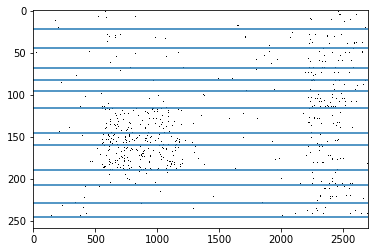

In [20]:
plt.imshow(raster[sorted_indices], aspect='auto', cmap='gray_r')
for c in cum_counts:
    plt.axhline(c)
# plt.yticks(ticks=cum_counts, labels=unique_dirs)
plt.show()

# this plot is insufficient, we need a tuning curve!

In [21]:
# computing the mean firing rate of this neuron during the sampling period (600 to 1100) for each direction

count_start = 600
count_stop = 1100
conversion = 1000 / (count_stop - count_start)

direction_spike_rate = []
for d in unique_dirs:
    trials_in_d = unsorted_directions == d
    raster_slice = raster[trials_in_d, count_start:count_stop]
    spike_count = np.sum(raster_slice, axis=1)
    mean_spike_count = np.mean(spike_count)

    mean_spike_rate = mean_spike_count * conversion

    direction_spike_rate.append(mean_spike_rate)

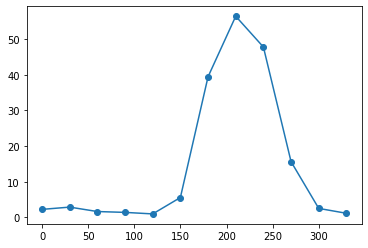

In [22]:
plt.plot(unique_dirs, direction_spike_rate, 'o-')
plt.show()

In [23]:
# wrapping it all in a function

def compute_direction_spike_rate(neuron_dict, count_start, count_stop):
    """
    Parameter:
    neuron_dict: dict
        dictionary containing the neural data
    count_start: int
        time in ms when we start counting
    count_stop: int
        time in ms when we stop counting spikes
    
    Returns:
    direction_spike_rate: list
        firing rate for each direction
    """

    conversion = 1000 / (count_stop - count_start)
    unique_dirs = neuron_dict['udirs']
    direction_spike_rate = []
    for d in unique_dirs:
        trials_in_d = neuron_dict['samp_direction_this_trial'].squeeze() == d
        raster_slice = neuron_dict['trial_raster'][trials_in_d, count_start:count_stop]
        spike_count = np.sum(raster_slice, axis=1)
        mean_spike_count = np.mean(spike_count)
        mean_spike_rate = mean_spike_count * conversion
        direction_spike_rate.append(mean_spike_rate)
    
    return direction_spike_rate

In [24]:
# a function that loads a neuron when given a filename and that adds
# a key to this dictionary that will hold the name of the neuron
# and a key for the unique directions

In [25]:
# creating an empty dictionary
dictionary = {}
# adding a key - value pair to it
dictionary['new key'] = np.random.rand(10)
# again
dictionary['second key'] = 'my favorite string'
dictionary.keys(), dictionary['second key']

(dict_keys(['new key', 'second key']), 'my favorite string')

In [26]:
def load_neuron(filename):
    """
    loads neuron and add its name and unique directions
    
    Parameter:
    filname: str
        path to the neuron
        
    Return:
    neuron: dict
        dictionary containing the neural data
    """
    neuron = loadmat(filename)
    neuron['name'] = filename[-11:-4]
    neuron['udirs'] = np.unique(neuron['samp_direction_this_trial'].squeeze())
    return neuron

In [27]:
mt_neuron = load_neuron(mt_neuron_path)
print(mt_neuron['name'])
compute_direction_spike_rate(mt_neuron, 600, 1100)

dseao01


[2.2727272510528564,
 2.909090995788574,
 1.6666666269302368,
 1.4285714626312256,
 1.0,
 5.599999904632568,
 39.46666717529297,
 56.42856979370117,
 47.79999923706055,
 15.647058486938477,
 2.545454502105713,
 1.1764706373214722]

In [28]:
def plot_direction_tuning(filename, count_start, count_stop, polar=False):
    """
    this function plots the tuning curve
    
    Parameter:
    filename: str
        path to file
    count_start: int
        time in ms when we start counting
    count_stop: int
        time in ms when we stop counting spikes
    polar: bool, optional
        if True, this function will make a polar plot
    """
    neuron = load_neuron(filename)
    direction_spike_rate = compute_direction_spike_rate(neuron, count_start, count_stop)
        
    if polar:
        dirs = np.array(neuron['udirs'] / 360 * 2 * np.pi)
        dirs = np.concatenate((dirs, [dirs[0]]))
        amplitude = np.array(direction_spike_rate)
        amplitude = np.concatenate((amplitude, [amplitude[0]]))
        
        plt.polar(dirs, amplitude, 'o-')
        plt.polar([135/360 * 2 * np.pi, 315/360 * 2 * np.pi], [amplitude.max()] * 2, 'k')
        
    else:
        plt.figure()
        plt.plot(neuron['udirs'], direction_spike_rate, 'o-')
        plt.xlabel('direction in degrees')
        plt.ylabel('firing rate')
        plt.title('Tuning of neuron ' + neuron['name'] + ' from ' + str(count_start) + ' to ' + str(count_stop) + ' ms')
        plt.show()

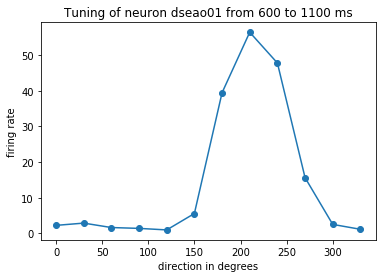

In [29]:
plot_direction_tuning(mt_neuron_path, 600, 1100)
# this neuron is nicely tuned to the direction of motion displayed

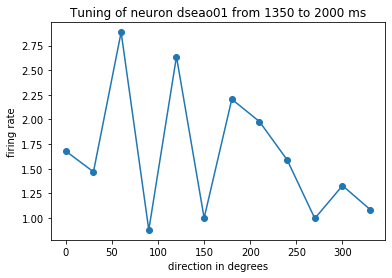

In [30]:
plot_direction_tuning(mt_neuron_path, 1350, 2000)
# not very active / neither tuned during the delay

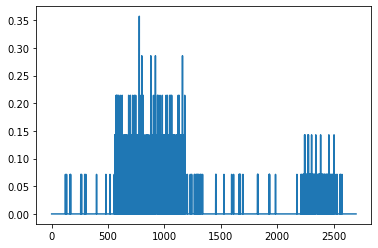

In [49]:
# computing the PSTH: peri stimulus time histogram

index_trials = mt_neuron['samp_direction_this_trial'].squeeze() == 210
raster_slice = mt_neuron['trial_raster'][index_trials]
PSTH = np.mean(raster_slice, axis=0)

plt.plot(PSTH)

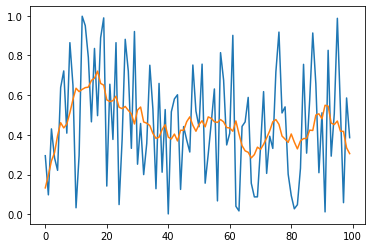

In [50]:
# smoothing the PSTH using convolution (more to come in mathtools, stay tuned)

signal = np.random.rand(100)
N = 10
box = np.ones(N)/N

smoothed = np.convolve(signal, box, 'same')

plt.plot(signal)
plt.plot(smoothed)

In [51]:
# wrapping it in a function

def plot_PSTH(filename, direction, smoothing_width=50):
    """
    Arguments
    filename: str
        path to the neuron to load
    direction: int
        stimulus direction to focus on (note, needs to be one of the directions used in the experiement)
    smoothing_width: int, optional
        controls how 
    """
    
    neuron = load_neuron(filename)
    index_trials = neuron['samp_direction_this_trial'].squeeze() == direction
    raster_slice = neuron['trial_raster'][index_trials]
    PSTH = np.mean(raster_slice, axis=0)
    PSTH = PSTH * 1000
    
    box_filter = np.ones(smoothing_width) / smoothing_width
    PSTH_smoothed = np.convolve(PSTH, box_filter, 'same')

    plt.plot(PSTH_smoothed)
    plt.xlabel('time in ms')
    plt.ylabel('spikes / s')
    plt.title('PSTH of neuron ' + neuron['name'] + ' at direction ' + str(direction) + ' degrees')


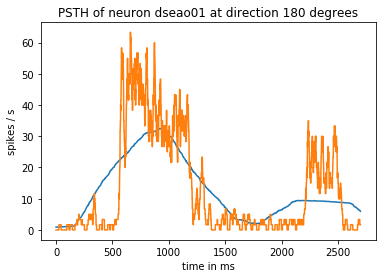

In [52]:
# reasoning about two extreme cases of smoothing
plot_PSTH(mt_neuron_path, 180, 800)
plot_PSTH(mt_neuron_path, 180, 20)

## The spiking of an LIP neuron

Let us reuse all these functions

In [53]:
lip_neuron_path = '../freedman2006/LIP/dhbbg05.mat'

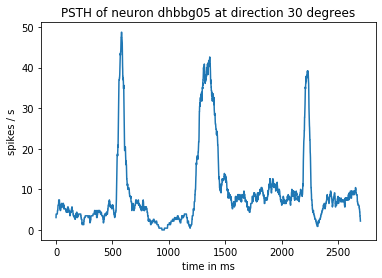

In [54]:
plot_PSTH(lip_neuron_path, 30)

# interesting! it has a peak during the delay period...

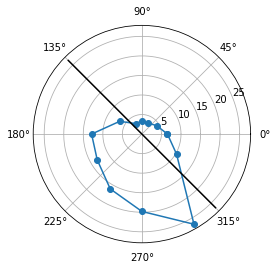

In [55]:
plot_direction_tuning(lip_neuron_path, 600, 1100, polar=True)
# this lip neuron is also direction tuned during sample epoch
# plot_direction_tuning(mt_neuron_path, 600, 1100, polar=True)

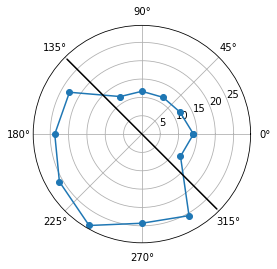

In [56]:
plot_direction_tuning(lip_neuron_path, 1350, 2000, polar=True)
# it seems to be category tuned during the delay
# either fires a lot, or not a lot, depending on the motion category

# Quantifying category tuning

Beyond squinting at two neurons, let us compare many MT and LIP neurons using the category index defined by the authors of this paper.


In [57]:
# introducing the idea of a script
import categorical_index_script as ci

In [58]:
mt_folder = '../freedman2006/MT'
lip_folder = '../freedman2006/LIP'

In [59]:
ci_mt_sample = ci.get_category_index_list(mt_folder, 135, 600, 1100)
ci_lip_delay = ci.get_category_index_list(lip_folder, 135, 1350, 2000)

In [62]:
# the data contains different number of neurons for each area
len(ci_lip_delay), len(ci_mt_sample)

(92, 67)

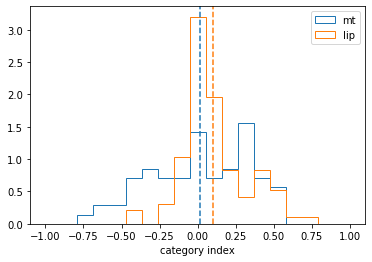

In [63]:
plt.figure()
plt.hist(ci_mt_sample, histtype='step', density=True, bins=np.linspace(-1,1,20), label='mt')
plt.axvline(np.mean(ci_mt_sample), c='C0', ls='--')
plt.hist(ci_lip_delay, histtype='step', density=True, bins=np.linspace(-1,1,20), label='lip')
plt.axvline(np.mean(ci_lip_delay), c='C1', ls = '--')
plt.legend()
plt.xlabel('category index')
plt.show()

In [64]:
lip2_folder = '../freedman2006/LIP2'

In [65]:
ci_lip2_delay = ci.get_category_index_list(lip2_folder, 225, 1350, 2000)
ci_lip2_delay_oldboundary = ci.get_category_index_list(lip2_folder, 135, 1350, 2000)

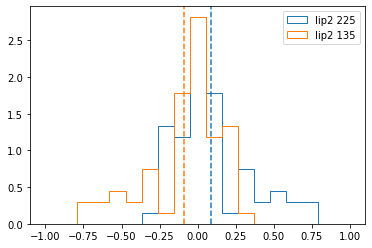

In [66]:
plt.hist(ci_lip2_delay, histtype='step', density=True, bins=np.linspace(-1,1,20), label='lip2 225')
plt.axvline(np.mean(ci_lip2_delay), c='C0', ls='--')
plt.hist(ci_lip2_delay_oldboundary, histtype='step', density=True, bins=np.linspace(-1,1,20), label='lip2 135')
plt.axvline(np.mean(ci_lip2_delay_oldboundary), c='C1', ls = '--')
plt.legend()
plt.show()